In [1]:
import pandas as pd
import seaborn as sns
import nasdaqdatalink
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
fetch_from_API = False

if fetch_from_API:
    nasdaqdatalink.ApiConfig.api_key = 'cMz6rH7NcNQz4NJeT4c6'
    ticker_dict = {'AAA': 'ML/AAAEY',
                   'A': 'ML/AEY',
                   'AA': 'ML/AAY',
                   'BBB': 'ML/BBBEY',
                   'BB': 'ML/BBY',
                   'B': 'ML/BEY',
                   'CCC': 'ML/CCCY'}
    tickers = [value for _, value in ticker_dict.items()]
    data = nasdaqdatalink.get(tickers)
    data.columns = [key for key, _ in ticker_dict.items()]
    data.to_csv('../data/CorpYields.csv')
else:
    data = pd.read_csv('../data/CorpYields.csv', index_col='DATE')

In [57]:
ticker_dict = {'TBills': 'USTREASURY/YIELD'}
tickers = [value for _, value in ticker_dict.items()]
data = nasdaqdatalink.get(tickers)

In [58]:
data.tail()

,USTREASURY/YIELD - 1 MO,USTREASURY/YIELD - 2 MO,USTREASURY/YIELD - 3 MO,USTREASURY/YIELD - 6 MO,USTREASURY/YIELD - 1 YR,USTREASURY/YIELD - 2 YR,USTREASURY/YIELD - 3 YR,USTREASURY/YIELD - 5 YR,USTREASURY/YIELD - 7 YR,USTREASURY/YIELD - 10 YR,USTREASURY/YIELD - 20 YR,USTREASURY/YIELD - 30 YR
Date,,,,,,,,,,,,
2022-01-31,0.03,0.13,0.22,0.49,0.78,1.18,1.39,1.62,1.75,1.79,2.17,2.11
2022-02-01,0.04,0.10,0.19,0.48,0.78,1.18,1.39,1.63,1.76,1.81,2.19,2.12
2022-02-02,0.04,0.10,0.19,0.45,0.76,1.16,1.38,1.60,1.74,1.78,2.17,2.11
2022-02-03,0.03,0.15,0.20,0.48,0.78,1.19,1.42,1.66,1.78,1.82,2.20,2.14
2022-02-04,0.05,0.12,0.23,0.56,0.89,1.31,1.55,1.78,1.90,1.93,2.29,2.23


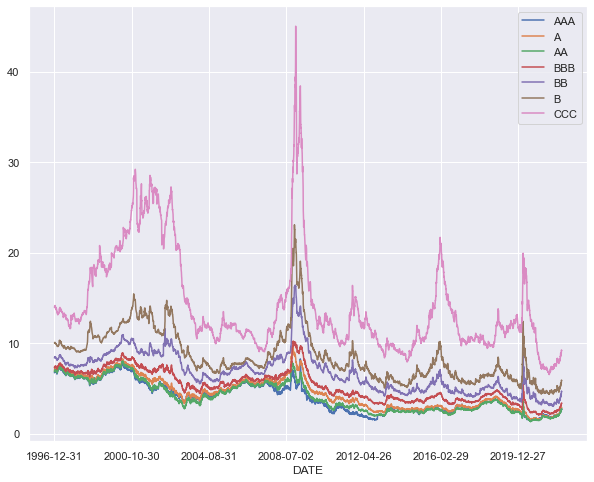

In [4]:
_ = data.plot()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6561 entries, 1996-12-31 to 2022-02-17
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAA     6561 non-null   float64
 1   A       6561 non-null   float64
 2   AA      6561 non-null   float64
 3   BBB     6561 non-null   float64
 4   BB      6561 non-null   float64
 5   B       6561 non-null   float64
 6   CCC     6561 non-null   float64
dtypes: float64(7)
memory usage: 410.1+ KB


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_pca_correlation_graph

In [42]:
diffs = data.diff().dropna()
sc = StandardScaler().fit(diffs)
diffs_std = sc.transform(diffs)

pca = PCA()
_ = pca.fit(diffs_std)

Text(0.5, 1.0, 'Cumulative Explained Variance')

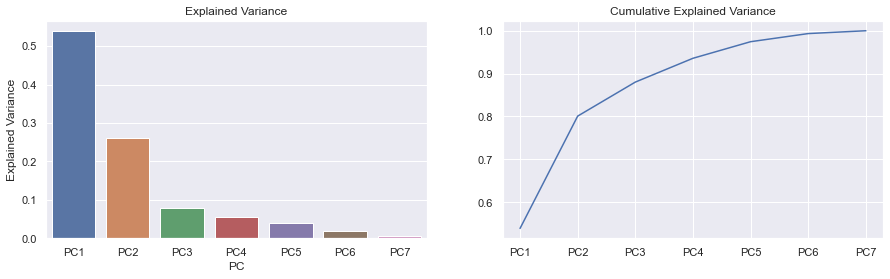

In [43]:
df = pd.DataFrame().from_dict({'PC': [f"PC{i+1}" for i, _ in enumerate(pca.explained_variance_ratio_)], 
                               'Explained Variance': pca.explained_variance_ratio_})
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
sns.barplot(x='PC', y='Explained Variance', data = df, ax = ax[0])
ax[1].plot(df['PC'], df['Explained Variance'].cumsum())
ax[0].set_title('Explained Variance')
ax[1].set_title('Cumulative Explained Variance')

In [48]:
n_components = 3
pca = PCA(n_components)
projected = pca.fit_transform(diffs_std)
df_proj = pd.DataFrame(projected)
df_proj.columns = [f'PC{i+1}' for i in range(n_components)]
df_proj.index = diffs.index

<AxesSubplot:xlabel='DATE'>

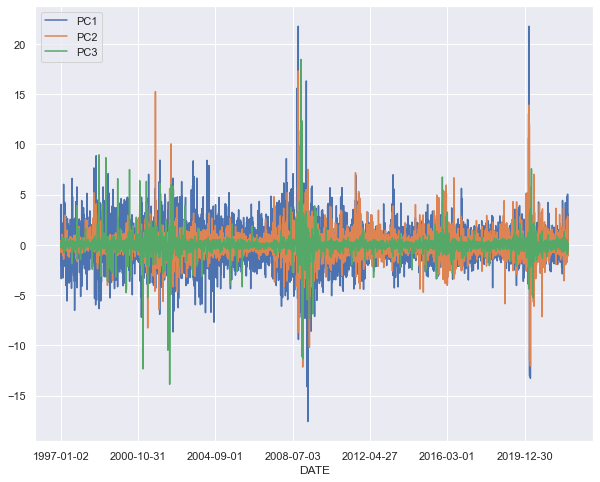

In [49]:
df_proj.plot()

,Dim 1,Dim 2
AAA,-0.840427,0.298485
A,-0.948957,0.202420
AA,-0.935606,0.242881
BBB,-0.923021,0.142228
BB,-0.498340,-0.676881
B,-0.354385,-0.778332
CCC,-0.251352,-0.749217


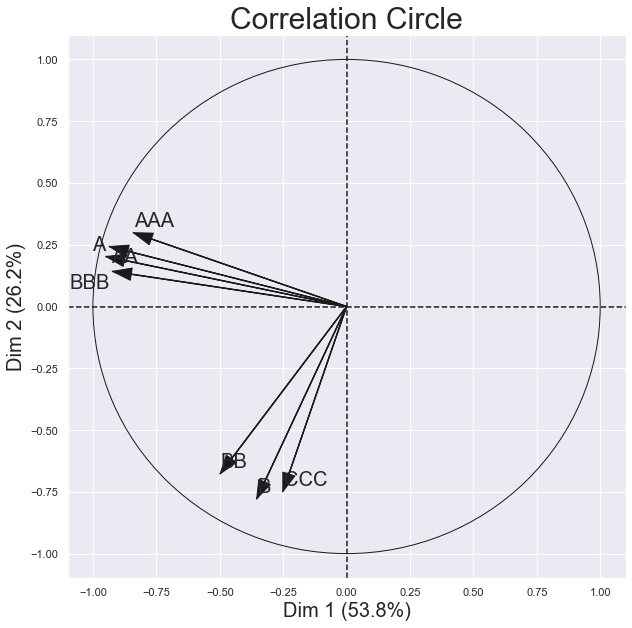

In [55]:
figure, correlation_matrix = plot_pca_correlation_graph(diffs_std,
                                                        diffs.columns,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)
correlation_matrix